In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import integrate

In [24]:
#e) Solución numérica del sistema 
l = 0.3
A = 0.01
k = 389.6
cv = 3/2
n = 1

C=(k*A)/(n*cv*l)

r0 = [400. , 200.]

N = 100
t = np.linspace(0.,10.,N)


In [25]:
def f0(T1,T2,C):
    return -C*(T1-T2)

def f1(T1,T2,C):
    return C*(T1-T2)

In [26]:
def GetEuler1(f0,f1,r0,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    T1 = np.zeros(len(t))
    T2 = np.zeros(len(t))
    
    T1[0] = r0[0]
    T2[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(T1[i-1], T2[i-1], C)
        K1[1] = f1(T1[i-1], T2[i-1], C)
        
        K2[0] = f0(T1[i-1]+h*K1[0], T2[i-1]+h*K1[1], C)
        K2[1] = f1(T1[i-1]+h*K1[0], T2[i-1]+h*K1[1], C)
              
        T1[i] = T1[i-1] + 0.5*h*(K1[0]) + 0.5*h*(K2[0])
        T2[i] = T2[i-1] + 0.5*h*(K1[1]) + 0.5*h*(K2[1])
        
    return T1,T2


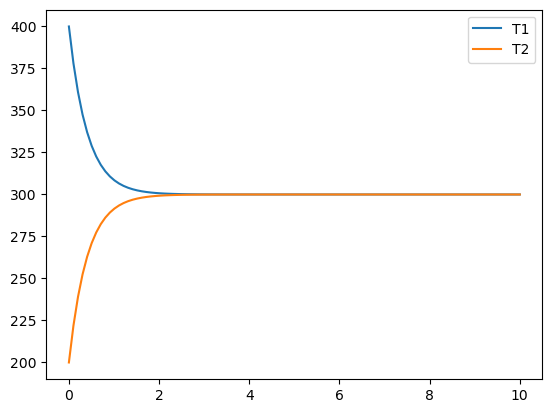

In [27]:
T1,T2 = GetEuler1(f0,f1,r0,t)

plt.figure()
plt.plot(t,T1, label = "T1")
plt.plot(t,T2, label = "T2")
plt.legend()
plt.show()


In [28]:
#e) límite termodinámico

lim_T1 = 0
lim_T2 = 0

diference = T1[0]-T2[0]

for i in range(len(t)):

    diference_1 = T1[i]-T2[i]
    
    if diference_1 < diference:
        
        diference = diference_1
        
        lim_T1 = T1[i]
        lim_T2 = T2[i]

print(lim_T1)
print(lim_T2)

300.0000000022225
299.99999999777754
